**TALLER 1- TERCER CORTE** 


*   Valentina Díaz Suárez



In [19]:
!pip install wooldridge
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wooldridge as wd
import statsmodels.api as sm 
import statsmodels.stats.api as sms  

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
df= wd.data("wage1")
df

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,0,1,1,0,0,2.708050,196,4
522,2.27,10,2,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0.819780,4,0
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,0,1,0,0,1.541159,169,324
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.447551,25,1


In [21]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   wage      526 non-null    float64
 1   educ      526 non-null    int64  
 2   exper     526 non-null    int64  
 3   tenure    526 non-null    int64  
 4   nonwhite  526 non-null    int64  
 5   female    526 non-null    int64  
 6   married   526 non-null    int64  
 7   numdep    526 non-null    int64  
 8   smsa      526 non-null    int64  
 9   northcen  526 non-null    int64  
 10  south     526 non-null    int64  
 11  west      526 non-null    int64  
 12  construc  526 non-null    int64  
 13  ndurman   526 non-null    int64  
 14  trcommpu  526 non-null    int64  
 15  trade     526 non-null    int64  
 16  services  526 non-null    int64  
 17  profserv  526 non-null    int64  
 18  profocc   526 non-null    int64  
 19  clerocc   526 non-null    int64  
 20  servocc   526 non-null    int64 

In [22]:
df.describe()


,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
count,526.000000,526.000000,526.00000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,...,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000,526.000000
mean,5.896103,12.562738,17.01711,5.104563,0.102662,0.479087,0.608365,1.043726,0.722433,0.250951,...,0.043726,0.287072,0.100760,0.258555,0.366920,0.167300,0.140684,1.623268,473.435361,78.150190
std,3.693086,2.769022,13.57216,7.224462,0.303805,0.500038,0.488580,1.261891,0.448225,0.433973,...,0.204680,0.452826,0.301298,0.438257,0.482423,0.373599,0.348027,0.531538,616.044772,199.434664
min,0.530000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.634878,1.000000,0.000000
25%,3.330000,12.000000,5.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.202972,25.000000,0.000000
50%,4.650000,12.000000,13.50000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.536867,182.500000,4.000000
75%,6.880000,14.000000,26.00000,7.000000,0.000000,1.000000,1.000000,2.000000,1.000000,0.750000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.928619,676.000000,49.000000
max,24.980000,18.000000,51.00000,44.000000,1.000000,1.000000,1.000000,6.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.218076,2601.000000,1936.000000


In [23]:
df.tail()

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
521,15.00,16,14,2,0,1,1,2,0,0,...,0,0,0,1,1,0,0,2.708050,196,4
522,2.27,10,2,0,0,1,0,3,0,0,...,0,1,0,0,1,0,0,0.819780,4,0
523,4.67,15,13,18,0,0,1,3,0,0,...,0,0,0,0,1,0,0,1.541159,169,324
524,11.56,16,5,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,2.447551,25,1
525,3.50,14,5,4,1,1,0,2,0,0,...,0,0,0,1,0,1,0,1.252763,25,16


In [24]:
df.head()


,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.10,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0
1,3.24,12,22,2,0,1,1,3,1,0,...,0,0,1,0,0,0,1,1.175573,484,4
2,3.00,11,2,0,0,0,0,2,0,0,...,0,1,0,0,0,0,0,1.098612,4,0
3,6.00,8,44,28,0,0,1,0,1,0,...,0,0,0,0,0,1,0,1.791759,1936,784
4,5.30,12,7,2,0,0,1,1,0,0,...,0,0,0,0,0,0,0,1.667707,49,4


In [25]:
cuanti= ["wage","educ","exper","tenure","lwage","expersq","tenursq","northcen"]
cuanti

['wage', 'educ', 'exper', 'tenure', 'lwage', 'expersq', 'tenursq', 'northcen']

In [26]:
cuali= ["nonwhite","female","married","smsa","northcen","trcommpu","trade","services","profserv", "profocc","clerocc","servocc"]
cuali

['nonwhite',
 'female',
 'married',
 'smsa',
 'northcen',
 'trcommpu',
 'trade',
 'services',
 'profserv',
 'profocc',
 'clerocc',
 'servocc']

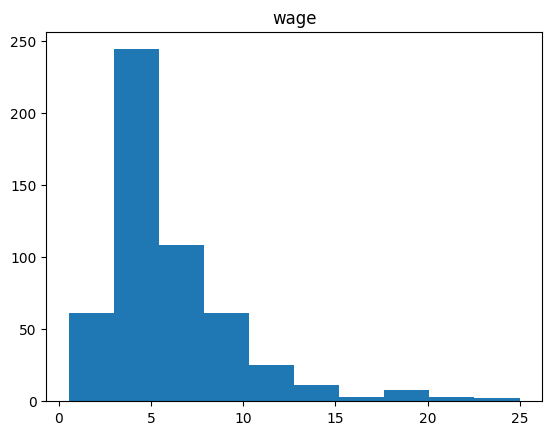

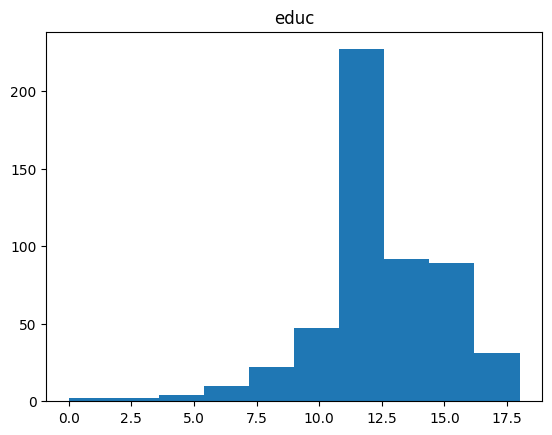

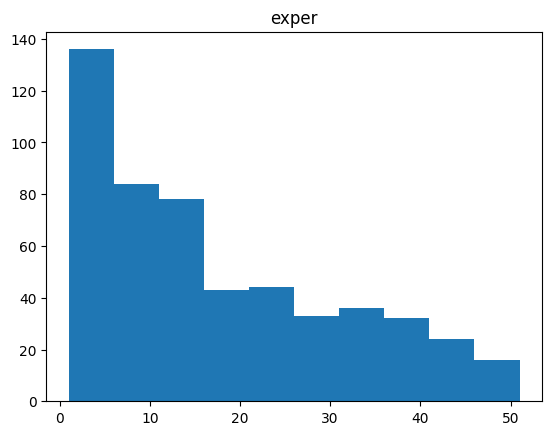

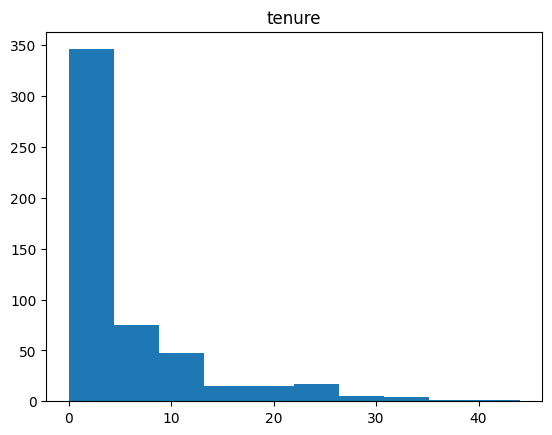

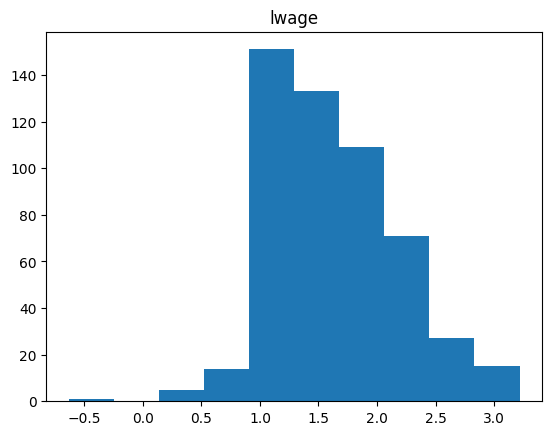

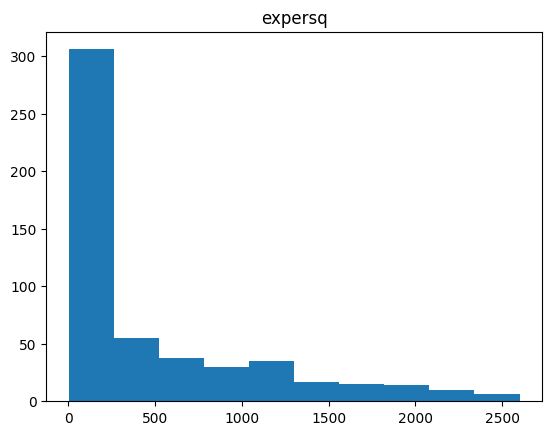

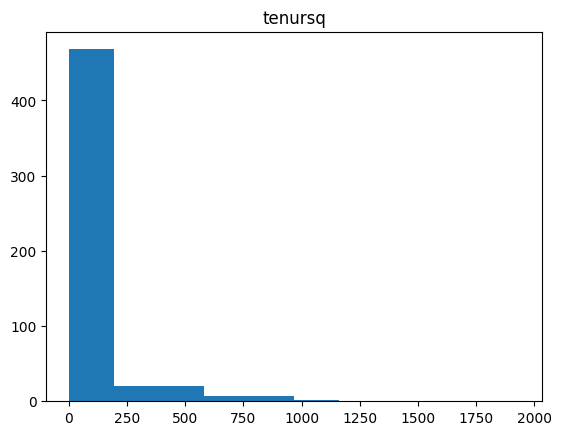

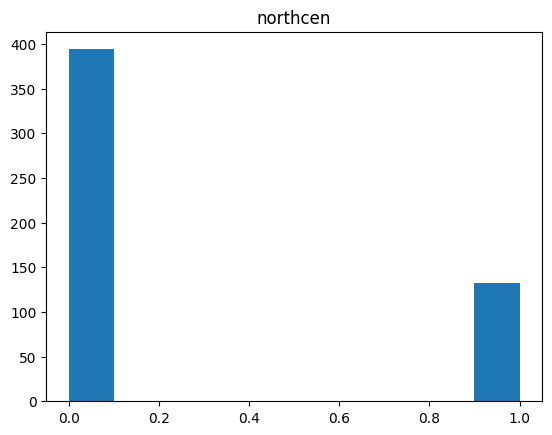

In [27]:
for col in cuanti:
  plt.hist(df[col])
  plt.title(col)
  plt.show()

0    472
1     54
Name: nonwhite, dtype: int64
0    472
1     54
Name: nonwhite, dtype: int64


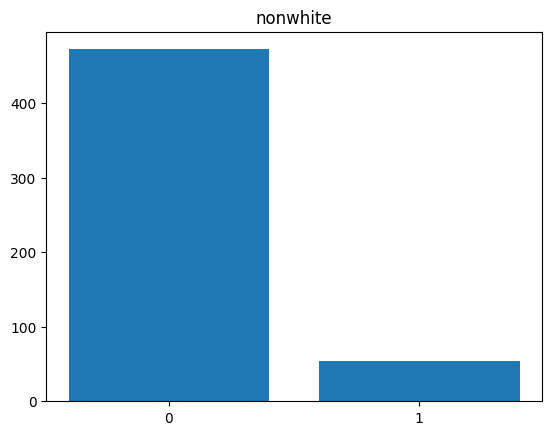

0    274
1    252
Name: female, dtype: int64
0    274
1    252
Name: female, dtype: int64


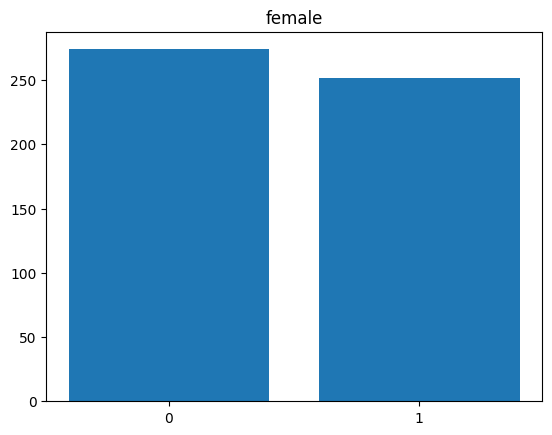

1    320
0    206
Name: married, dtype: int64
0    206
1    320
Name: married, dtype: int64


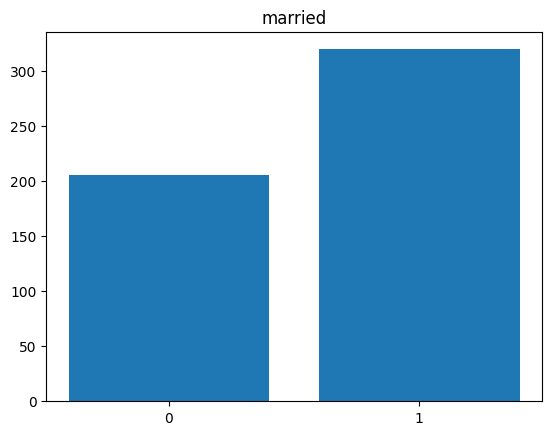

1    380
0    146
Name: smsa, dtype: int64
0    146
1    380
Name: smsa, dtype: int64


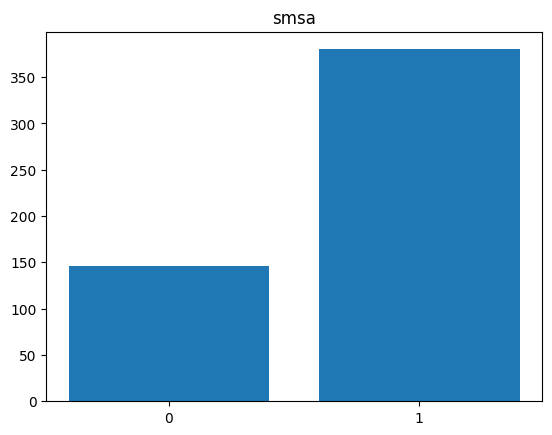

0    394
1    132
Name: northcen, dtype: int64
0    394
1    132
Name: northcen, dtype: int64


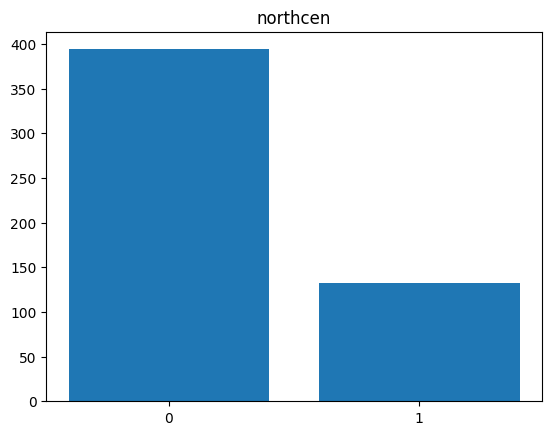

0    503
1     23
Name: trcommpu, dtype: int64
0    503
1     23
Name: trcommpu, dtype: int64


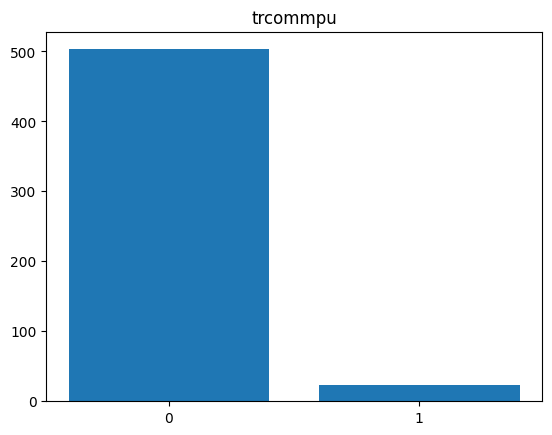

0    375
1    151
Name: trade, dtype: int64
0    375
1    151
Name: trade, dtype: int64


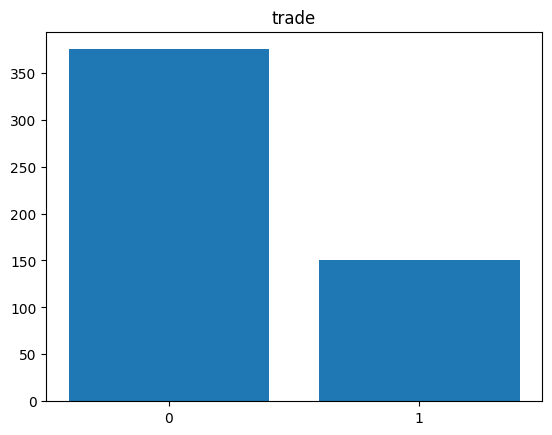

0    473
1     53
Name: services, dtype: int64
0    473
1     53
Name: services, dtype: int64


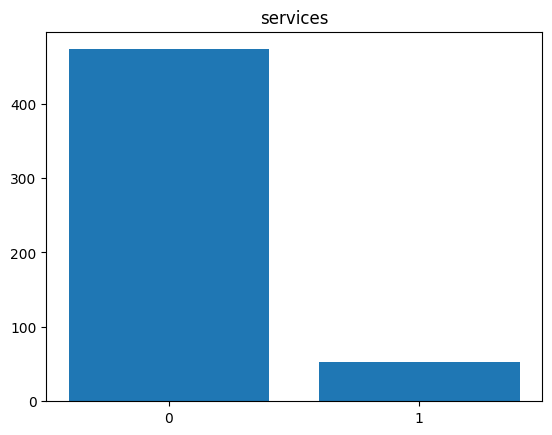

0    390
1    136
Name: profserv, dtype: int64
0    390
1    136
Name: profserv, dtype: int64


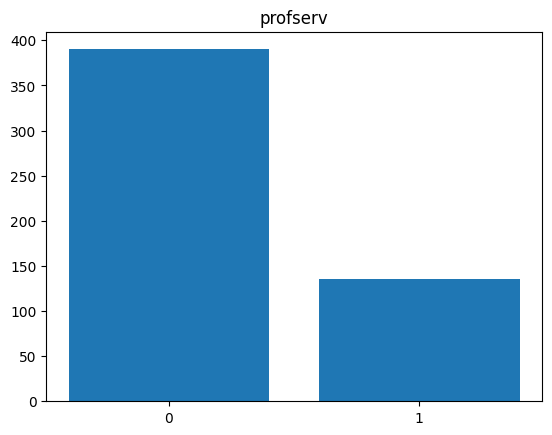

0    333
1    193
Name: profocc, dtype: int64
0    333
1    193
Name: profocc, dtype: int64


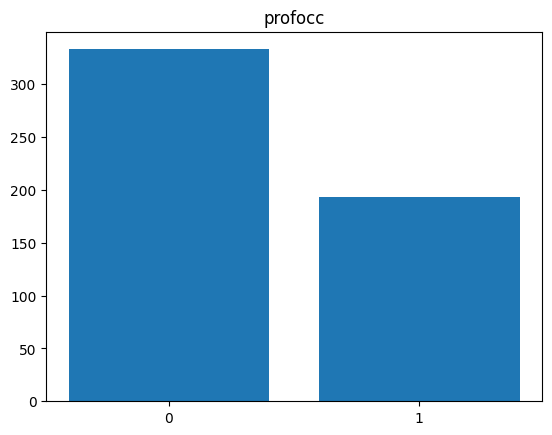

0    438
1     88
Name: clerocc, dtype: int64
0    438
1     88
Name: clerocc, dtype: int64


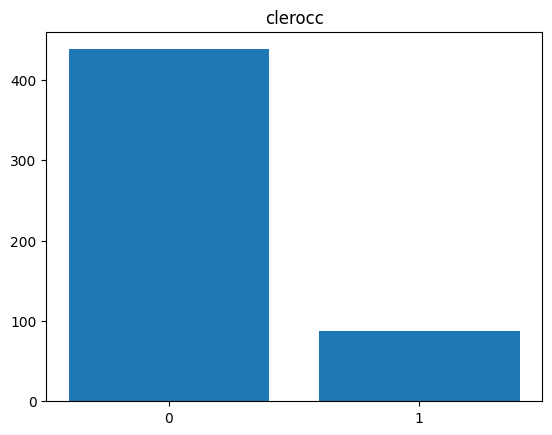

0    452
1     74
Name: servocc, dtype: int64
0    452
1     74
Name: servocc, dtype: int64


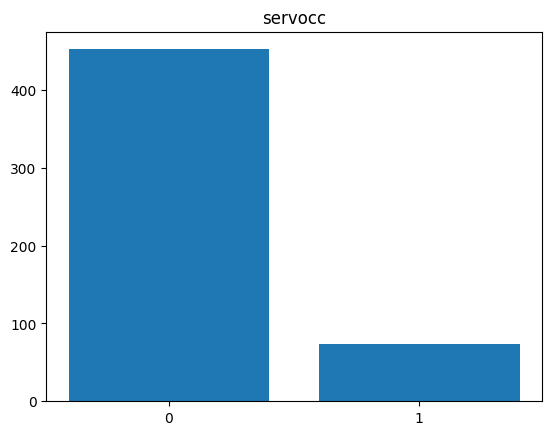

In [28]:
for col in cuali:
  print(df[col].value_counts())
  cuali1=df[col].value_counts().sort_index() #organizar el orden de las variables 
  print(cuali1) 
  cuali1.index = ['0', '1'] #col=recorrer las columnas
  plt.bar(cuali1.index, cuali1.values) 
  plt.title(col)
  plt.show()

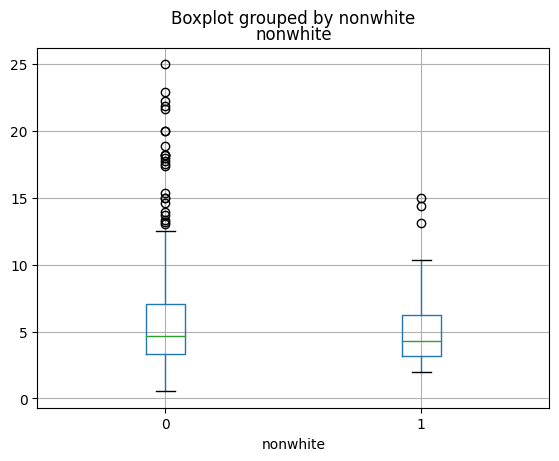

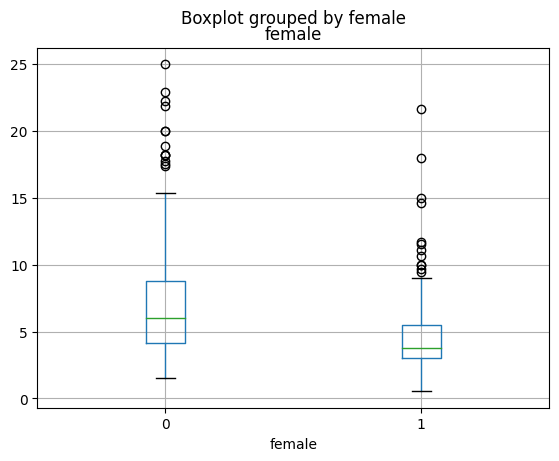

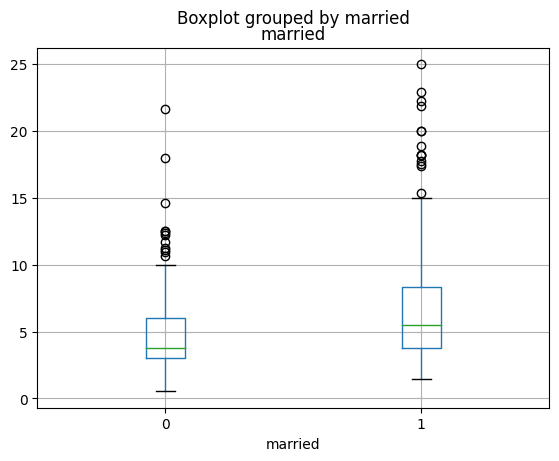

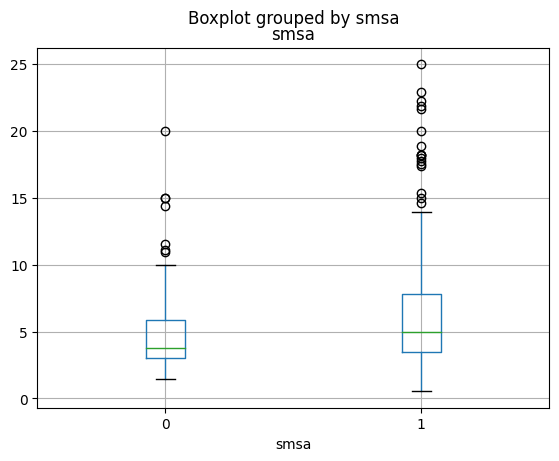

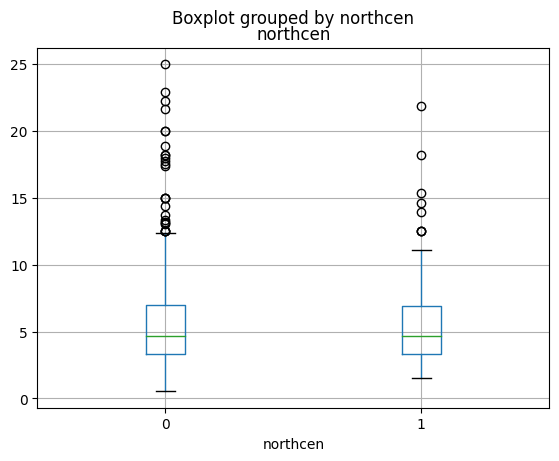

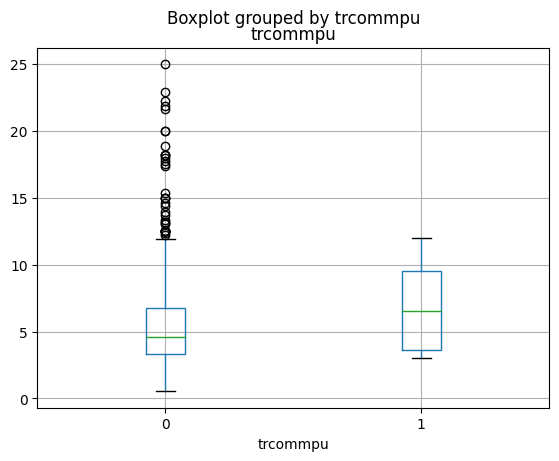

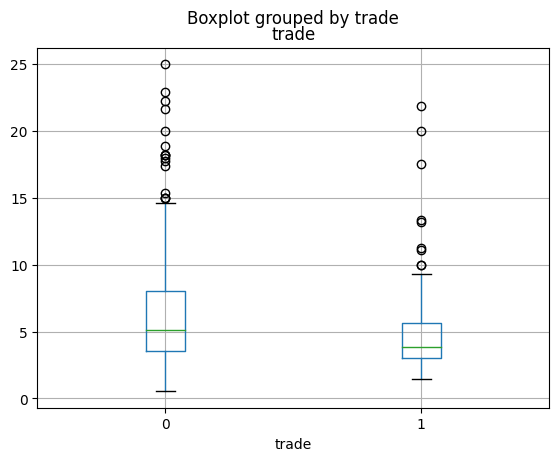

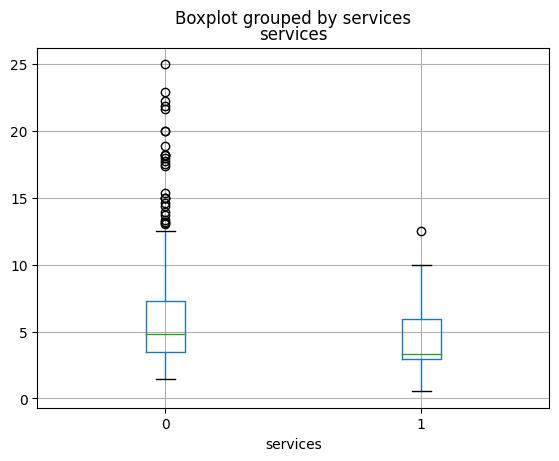

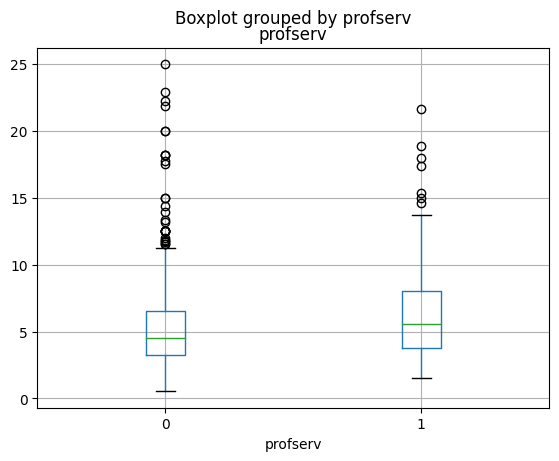

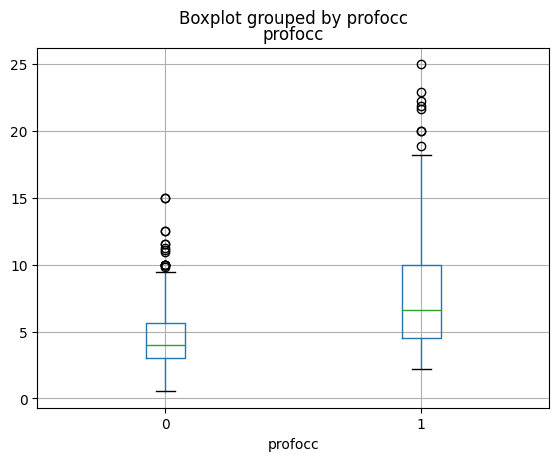

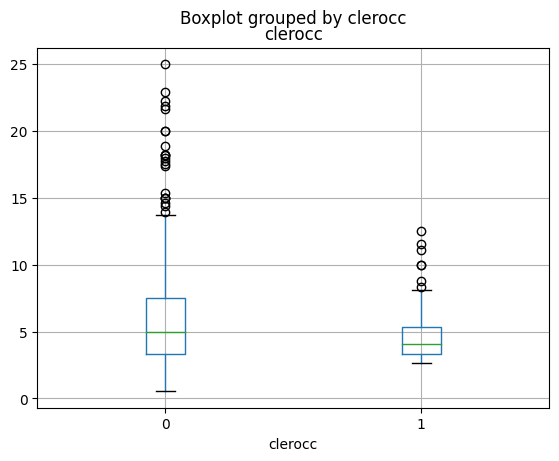

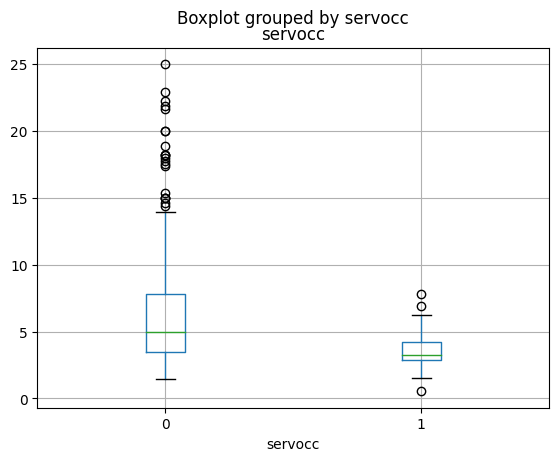

In [29]:
for col in cuali:
  df.boxplot(column="wage",by=col) 
  plt.title(col)
  plt.show()

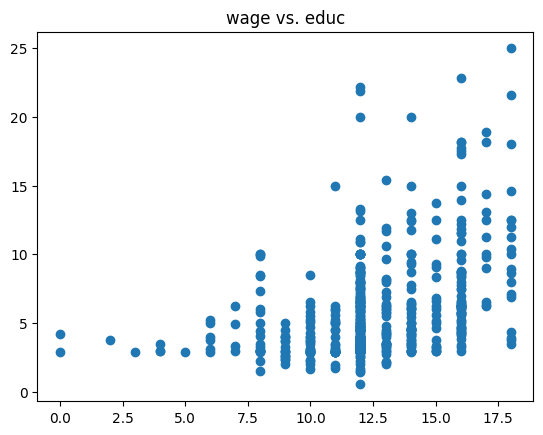

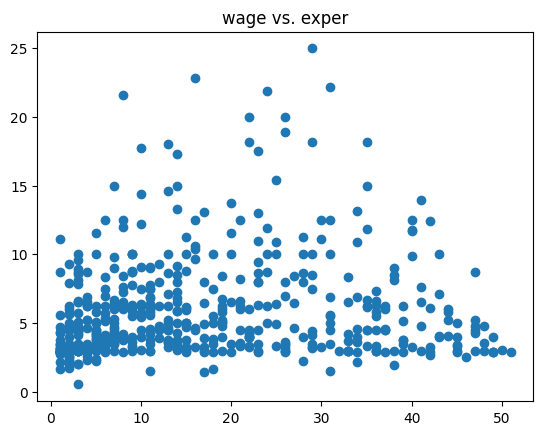

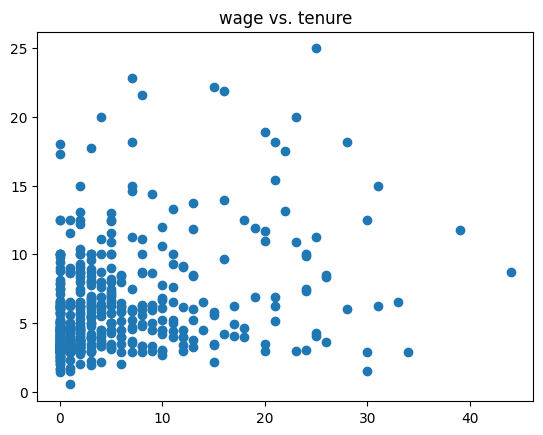

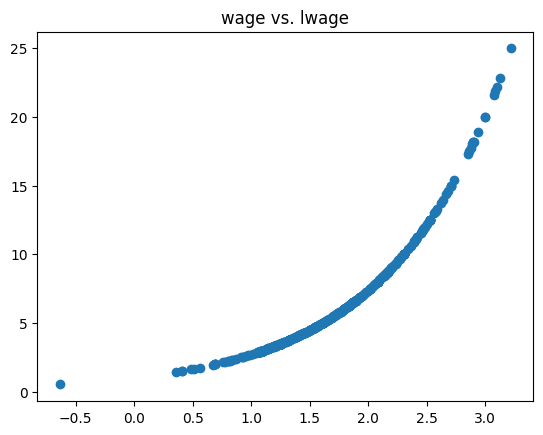

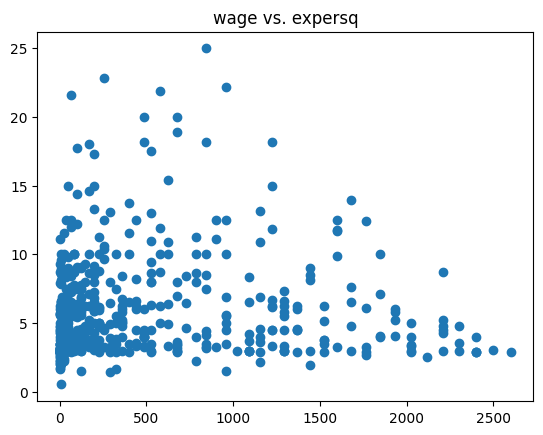

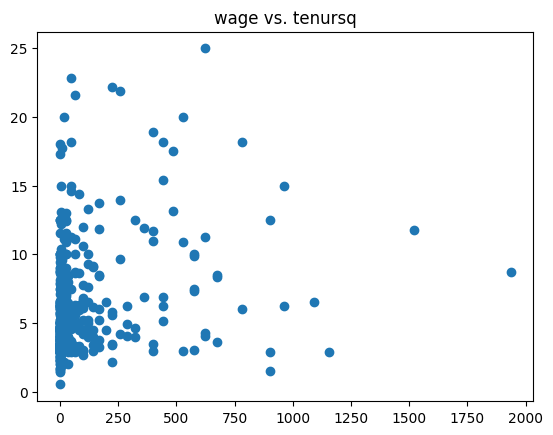

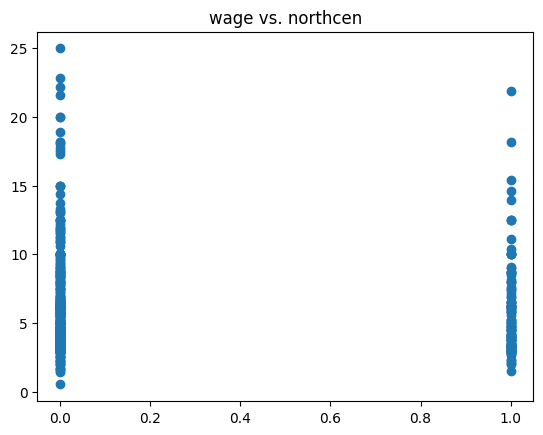

In [32]:
for col in cuanti[1:]:
  plt.scatter(df[col], df["wage"]) 
  plt.title(f"wage vs. {col}")
  plt.show()

<Axes: xlabel='married', ylabel='wage'>

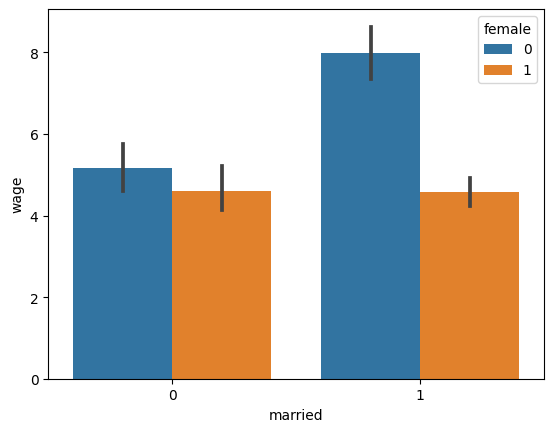

In [34]:
sns.barplot(data=df, x="married", y="wage", hue="female")

<Axes: xlabel='nonwhite', ylabel='wage'>

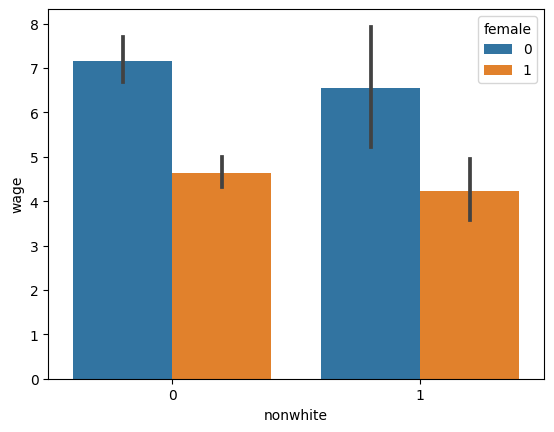

In [37]:
sns.barplot(data=df, x="nonwhite", y="wage", hue="female")

<Axes: xlabel='smsa', ylabel='wage'>

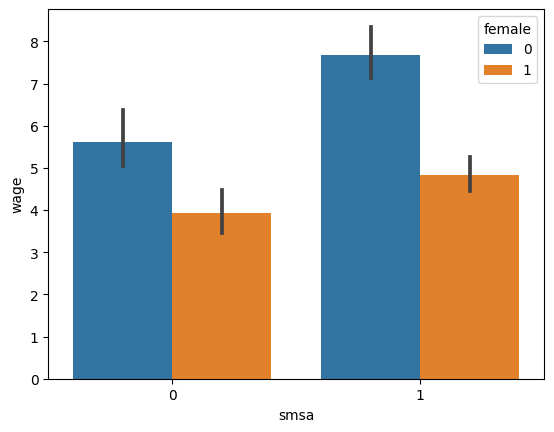

In [38]:
sns.barplot(data=df, x="smsa", y="wage", hue="female")

<Axes: xlabel='northcen', ylabel='wage'>

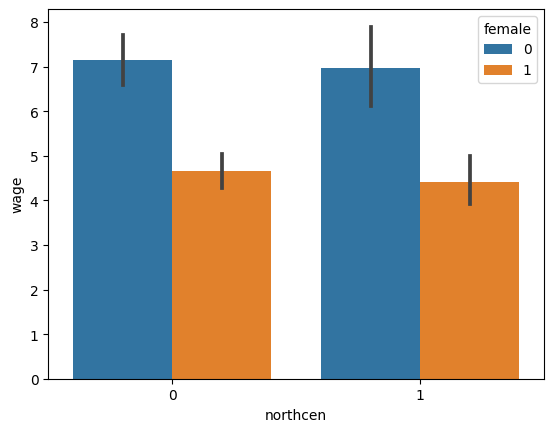

In [39]:
sns.barplot(data=df, x="northcen", y="wage", hue="female")

<Axes: xlabel='trcommpu', ylabel='wage'>

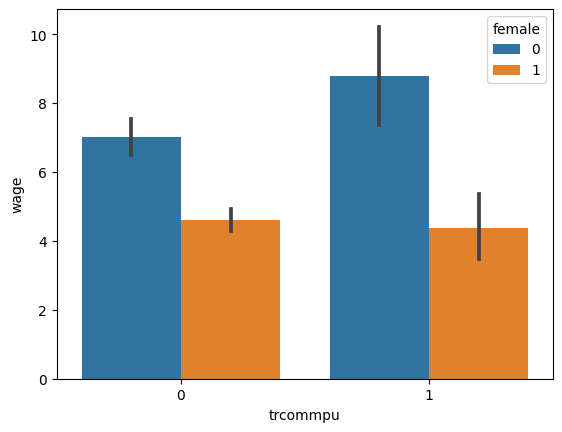

In [40]:
sns.barplot(data=df, x="trcommpu", y="wage", hue="female")

<Axes: xlabel='trade', ylabel='wage'>

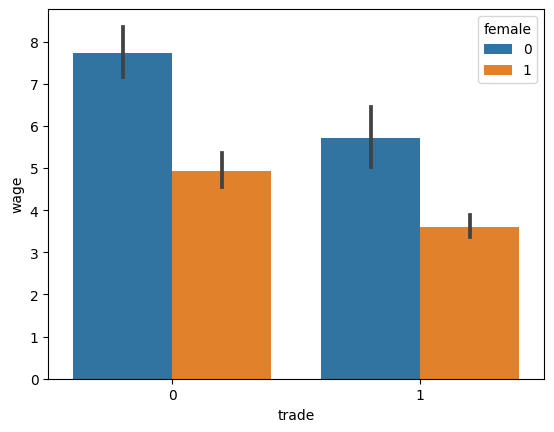

In [41]:
sns.barplot(data=df, x="trade", y="wage", hue="female")

<Axes: xlabel='services', ylabel='wage'>

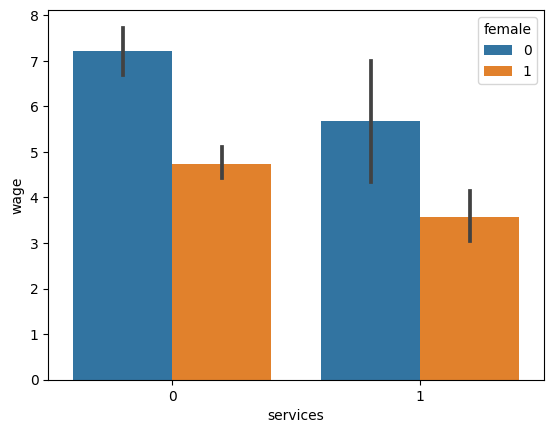

In [42]:
sns.barplot(data=df, x="services", y="wage", hue="female")

<Axes: xlabel='profserv', ylabel='wage'>

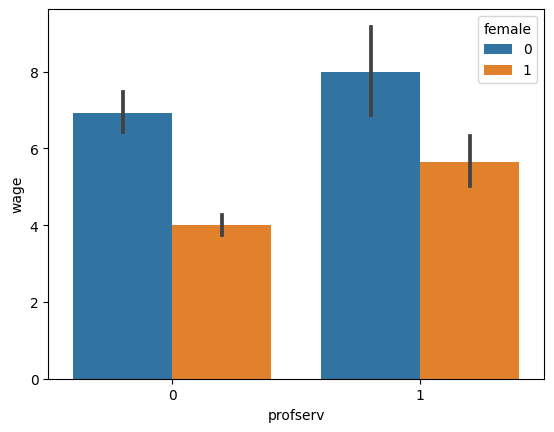

In [43]:
sns.barplot(data=df, x="profserv", y="wage", hue="female")

<Axes: xlabel='profocc', ylabel='wage'>

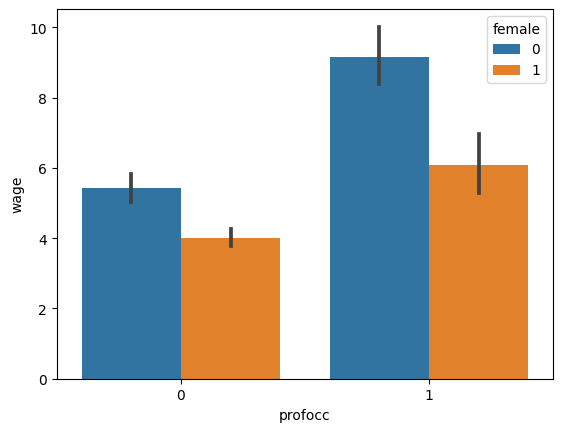

In [44]:
sns.barplot(data=df, x="profocc", y="wage", hue="female")

<Axes: xlabel='clerocc', ylabel='wage'>

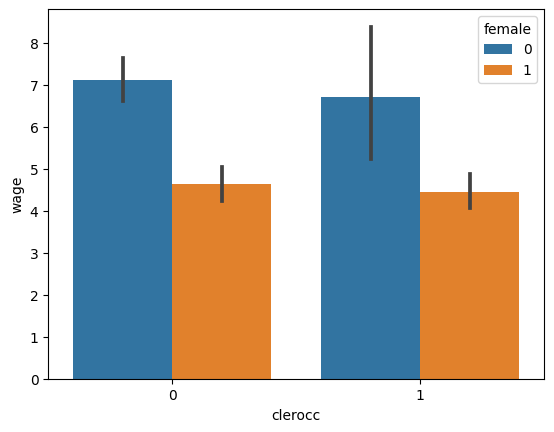

In [45]:
sns.barplot(data=df, x="clerocc", y="wage", hue="female")

In [46]:
X= df [["exper","educ","expersq","female","married","nonwhite","tenure","tenursq","smsa","profserv"]]
X= sm.add_constant(X)
X.head()

,const,exper,educ,expersq,female,married,nonwhite,tenure,tenursq,smsa,profserv
0,1.0,2,11,4,1,0,0,0,0,1,0
1,1.0,22,12,484,1,1,0,2,4,1,0
2,1.0,2,11,4,0,0,0,0,0,0,0
3,1.0,44,8,1936,0,1,0,28,784,1,0
4,1.0,7,12,49,0,1,0,2,4,0,0


In [47]:
y=df["wage"]

In [48]:
model=sm.OLS(y,X).fit()

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     37.05
Date:                Tue, 09 May 2023   Prob (F-statistic):           1.46e-54
Time:                        00:21:50   Log-Likelihood:                -1290.5
No. Observations:                 526   AIC:                             2603.
Df Residuals:                     515   BIC:                             2650.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.1501      0.725     -2.965      0.003      -3.575      -0.726
exper          0.1891      0.038      4.985      0.000       0.115       0.264
educ           0.4673      0.051      9.163      0.000       0.367       0.567
expersq       -0.0038      0.001     -4.795      0.000      -0.005      -0.002
female        -1.9232      0.265     -7.254      0.000      -2.444      -1.402
married        0.1108      0.293      0.378      0.706      -0.465       0.687
nonwhite      -0.1837      0.412     -0.446      0.656      -0.993       0.626
tenure         0.2047      0.049      4.189      0.000       0.109       0.301
tenursq       -0.0028      0.002     -1.658      0.098      -0.006       0.001
smsa           0.9285      0.287      3.239      0.001       0.365       1.492
profserv       0.5665      0.301      1.881      0.060      -0.025       1.158
==============================================================================
Omnibus:                      181.279   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              696.970
Skew:                           1.546   Prob(JB):                    4.52e-152
Kurtosis:                       7.716   Cond. No.                     4.67e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**HETEROCEDASTICIDAD**

In [50]:
sms.het_white(model.resid,model.model.exog) #PRUEBA DE WHITE

(101.00521719009933,
 0.00040429241673055485,
 1.9135908914681004,
 0.00014240651679396318)

In [51]:
sms.het_breuschpagan(model.resid,model.model.exog) #PRUEBA DE BREUSCHPAGAN

(52.44928107000575,
 9.421066371391381e-08,
 5.704009870808814,
 3.894350716066714e-08)

**CONCLUSIÓN: Con las dos pruebas se puede afirmar que el modelo es heterocedastico, puesto que el p-valor se encuentra por debajo del 5%. Por lo que, rechazo la hipótesis Nula H0: SO=s1=s2=s3...=s10 y concluyo que alguna de las variables está afectando al salario**